In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy.io as sio
%matplotlib widget
import jupyter 
import matplotlib

In [2]:
import sys  
!{sys.executable} -m pip install --user matplotlib

In [12]:
%pip install ipympl
%pip install matplotlib
%pip install jupyter-matplotlib


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement jupyter-matplotlib (from versions: none)
ERROR: No matching distribution found for jupyter-matplotlib
Note: you may need to restart the kernel to use updated packages.


In [2]:
import ipympl

In [3]:
data = sio.loadmat('original/subject_1.mat')


In [4]:
meta = sio.loadmat('original/subject_1.mat')
meta = meta['meta']
meta[0][0][6].shape


(37913, 3)

In [13]:
coords = meta[0][0][6]

In [8]:
data['data'].shape
data = np.transpose(data['data'])

In [9]:
data.shape

(37913, 1351)

In [10]:
#find standard deviation of every row in data
std = np.std(data, axis=1)
#get indices of top 5000 std
top_5000 = np.argsort(std)[-5000:]
top_5000


array([17958,  4949, 12311, ..., 34762, 31671, 34790])

In [11]:
#sort the top_5000 std values with their indices
sorted_std = np.sort(std[top_5000])
for i in sorted_std:
    print(i)


21.375224335045928
21.375769592763785
21.376583954749055
21.376966865627686
21.377037910988157
21.37705282740831
21.378118324969623
21.379219160319916
21.380599051884307
21.382105409350117
21.383383523709266
21.385588566684923
21.385846961880727
21.386789363112236
21.387055454696807
21.39104018173617
21.393001393526664
21.393427419486315
21.393791564436757
21.39452390751954
21.394529259726607
21.396843387646065
21.398329244888806
21.41025875941463
21.410415803619987
21.41066663181594
21.410956659449692
21.411592101533305
21.41296737385284
21.414690484745176
21.415497303390378
21.417450954728483
21.41900851395922
21.41963808987743
21.424908939927782
21.425676735408523
21.429271953664582
21.431689955876507
21.432020473385325
21.43289872687128
21.43317766630913
21.433836324235266
21.43805435322943
21.441865993258084
21.44346378365969
21.443874371498836
21.44660699482641
21.446787428706266
21.447375597361297
21.449959731031395
21.45089305796924
21.452275311537793
21.45366733373829
21.45455

In [11]:
for i in std:
    print(i)

6.562702714105387
6.469861353120893
7.8253815853045126
7.579254365160995
6.647694478901056
8.860920336325794
7.82447135269742
8.807847708286412
11.984123116478505
6.5842784151435305
9.176994534041514
6.7162077282039
7.3799152427494725
12.409703447083865
13.786948442611306
13.108369558920446
9.92055781929883
15.664031501597407
7.381221305632861
6.0036958974371775
7.695345154631197
9.118131171071301
12.291496486839707
13.925049995031076
28.30636991706212
6.823640976547315
8.374183631697882
13.391294520775814
9.532702778866273
8.350910071724224
15.525344894090617
20.438826402914003
24.423894477571658
17.699111115124996
10.571393588181795
19.246278896429963
12.464601964055715
13.692872489576564
14.425975926910358
14.669814317602842
9.13084419462948
9.009716636908546
9.47518288117237
12.081200452094311
13.04410961571882
9.88697423958142
12.212797742180756
9.422032130732559
10.78018876225769
14.539739776258834
14.569027053262074
14.080034096327978
17.391884550421292
12.56887198031198
8.25963

# Plotting the top 5000 across times

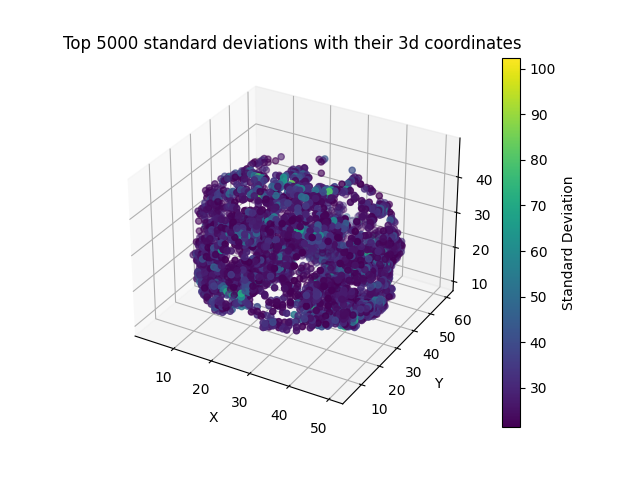

In [14]:
#plot the top 5000 std with their 3d coordinates in a 3d plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(coords[top_5000,0], coords[top_5000,1], coords[top_5000,2])
# #set their colors to be the std


#plot the top 500 std with their 3d coordinates in a 3d plot
#and also set their colors based on a color map and their std values
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(coords[top_5000,0], coords[top_5000,1], coords[top_5000,2], c=std[top_5000], cmap='viridis')

#label the plot
plt.title('Top 5000 standard deviations with their 3d coordinates')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#give a label to the color bar
plt.colorbar(sc).set_label('Standard Deviation')



plt.show()


In [15]:
data = sio.loadmat('original/subject_1.mat')

data =data['data']
data  = np.transpose(data)
data.shape
top_5000_data = []
for i in top_5000:
    top_5000_data.append(data[i])

top_5000_data = np.array(top_5000_data)
# top_5000_data.shape
# top_5000_data = np.transpose(top_5000_data)
#normalize the data to between -1 and 1



In [16]:
normalized_top_5000_data = []

for i in top_5000_data:
    normalized_top_5000_data.append((i - np.min(i))/(np.max(i)-np.min(i)))
normalized_top_5000_data = np.array(normalized_top_5000_data)
normalized_top_5000_data = np.transpose(normalized_top_5000_data)

In [17]:

normalized_top_5000_data.shape

(1351, 5000)

In [18]:
top_5000_data.shape

(5000, 1351)

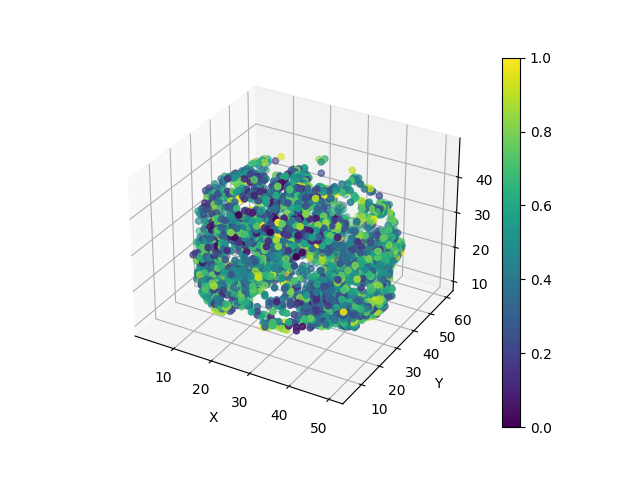

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(coords[top_5000,0], coords[top_5000,1], coords[top_5000,2], c=normalized_top_5000_data[1350], cmap='viridis')
plt.colorbar(sc)
#label the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')



plt.show()

In [28]:
top_5000_data.shape

(5000, 1351)

In [29]:
std[top_5000].shape

(5000,)

# Time vs Voxel Activations of top 5000 voxels on the basis of standard deviation

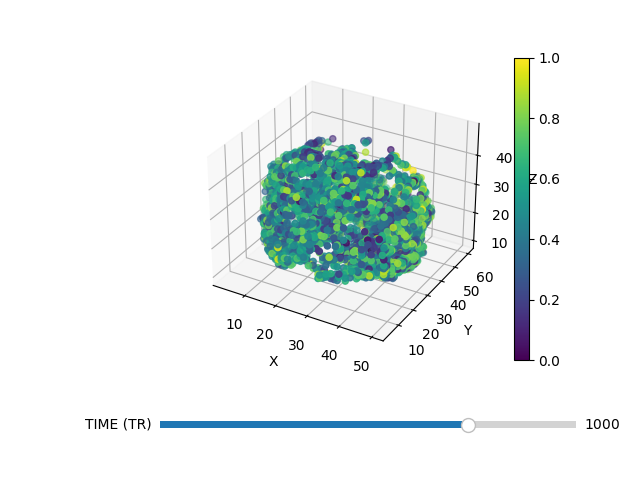

In [20]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.widgets import Button, Slider


# The parametrized function to be plotted
# def color_giver(t):
#     #return the activation values of the 5000 datapoints at time t
#     return top_5000_data[t]

t = np.linspace(0, 1350)

# Define initial parameters
init_time = 1000



# Create the figure and the color value that we will manipulate

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(coords[top_5000,0], coords[top_5000,1], coords[top_5000,2], c= normalized_top_5000_data[init_time] , cmap='viridis')
plt.colorbar(sc)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# fig, ax = plt.subplots()
# line, = ax.plot(t, f(t, init_amplitude, init_frequency), lw=2)
# ax.set_xlabel('Time [s]')

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axtime = fig.add_axes([0.25, 0.1, 0.65, 0.03])
time_slider = Slider(
    ax=axtime,
    label='TIME (TR)',
    valmin=0,
    valmax=1350,
    valinit=init_time,
)



# The function to be called anytime a slider's value changes
def update(val):
    #update the color of the scatterplot to c = color_giver(time_slider.val)
   
    sc.set_array(normalized_top_5000_data[int(time_slider.val)])
    
    fig.canvas.draw_idle()


# register the update function with each slider
time_slider.on_changed(update)


 

plt.show()

MovieWriter stderr:
convert-im6.q16: no images defined `animation.gif' @ error/convert.c/ConvertImageCommand/3229.



CalledProcessError: Command '['convert', '-size', '640x480', '-depth', '8', '-delay', '3.3333333333333335', '-loop', '0', 'rgba:-', '-layers', 'OptimizePlus', 'animation.gif']' returned non-zero exit status 1.

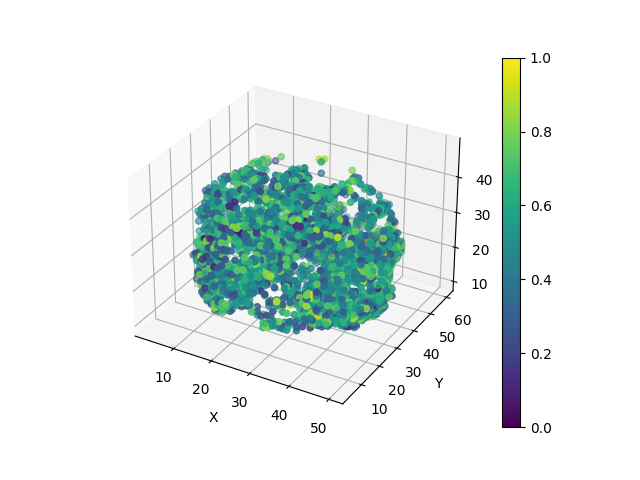

In [21]:
#animate the above plot by changing the time value from 0 to 1350 in 10 seconds
#save the animation as a gif
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(coords[top_5000,0], coords[top_5000,1], coords[top_5000,2], c=normalized_top_5000_data[0], cmap='viridis')
plt.colorbar(sc)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

def update(frame):
    sc.set_array(normalized_top_5000_data[frame])
    return sc,

ani = FuncAnimation(fig, update, frames=1350, blit=True)
ani.save('animation.gif', writer='imagemagick', fps=30)
plt.show()




In [ ]:
931
1103
1181
